# Histogram 直方圖的動機

如果我們有一組資料，我們很自然的想看這一組資料的分佈狀態，假設我們的資料是一維的資料，
我們可以用直方圖去統計不同區間的資料數量，但是對於同一組數據，
用不同的區間你會有不一樣的解讀，可以看下面的範例。



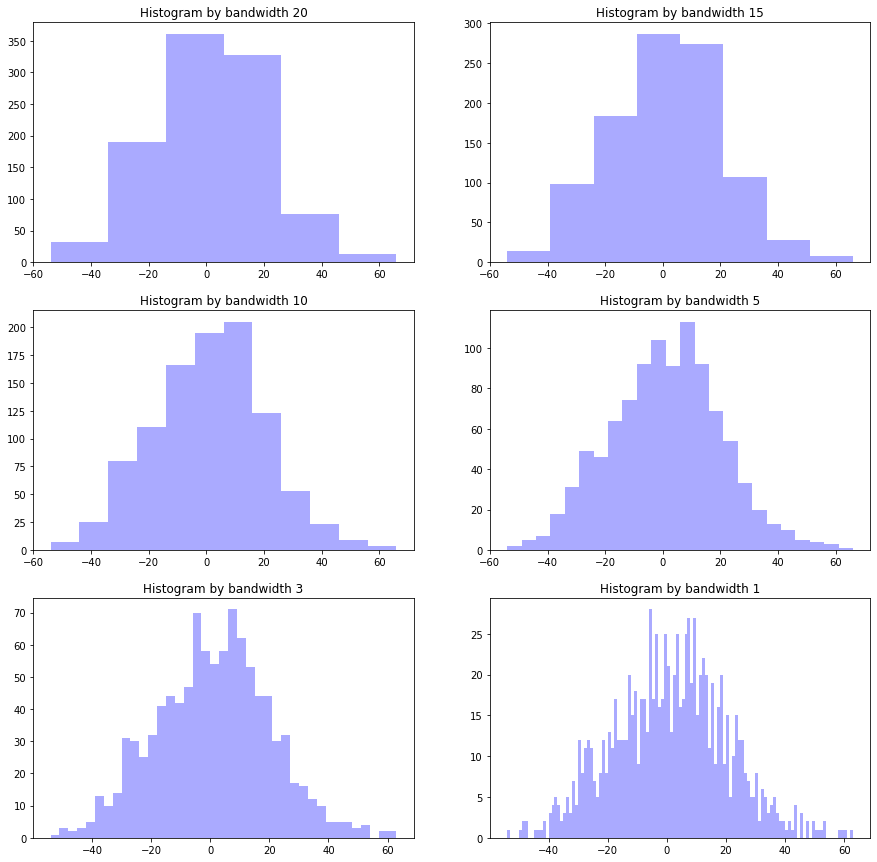

In [5]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

# 區間大小
bin_sizes = [20, 15, 10, 5, 3, 1]
if 'rand_data' not in locals():
    rand_data = random.randn(1000)*20


fig, ax = plt.subplots(3, 2)
for i, bin_size in enumerate(bin_sizes):
    axi = ax.ravel()[i]
    data_floor = int(np.floor(rand_data.min()))
    data_ceil  = int(np.ceil(rand_data.max())) + bin_size

    bins = range(data_floor, data_ceil, bin_size)
    hist, bins = np.histogram(rand_data, bins = bins)

    # print('Histogram: %s' % hist)
    axi.hist(rand_data, bins = bins, fc="#AAAAFF")
    axi.set_title("Histogram by bandwidth %s" % bin_size)



看上面的直方圖會發現直方圖有很大的缺點，
第一就是我們展現會受條的寬度影響，
再來就是很多收集的資料是離散的，
只要條的寬度一直減小，就會很不連續。


# Kernel function

下面要介紹核函數，[參考](https://scikit-learn.org/stable/modules/density.html#kernel-density)




Text(0.5, 1.0, 'Available Kernel Functions')

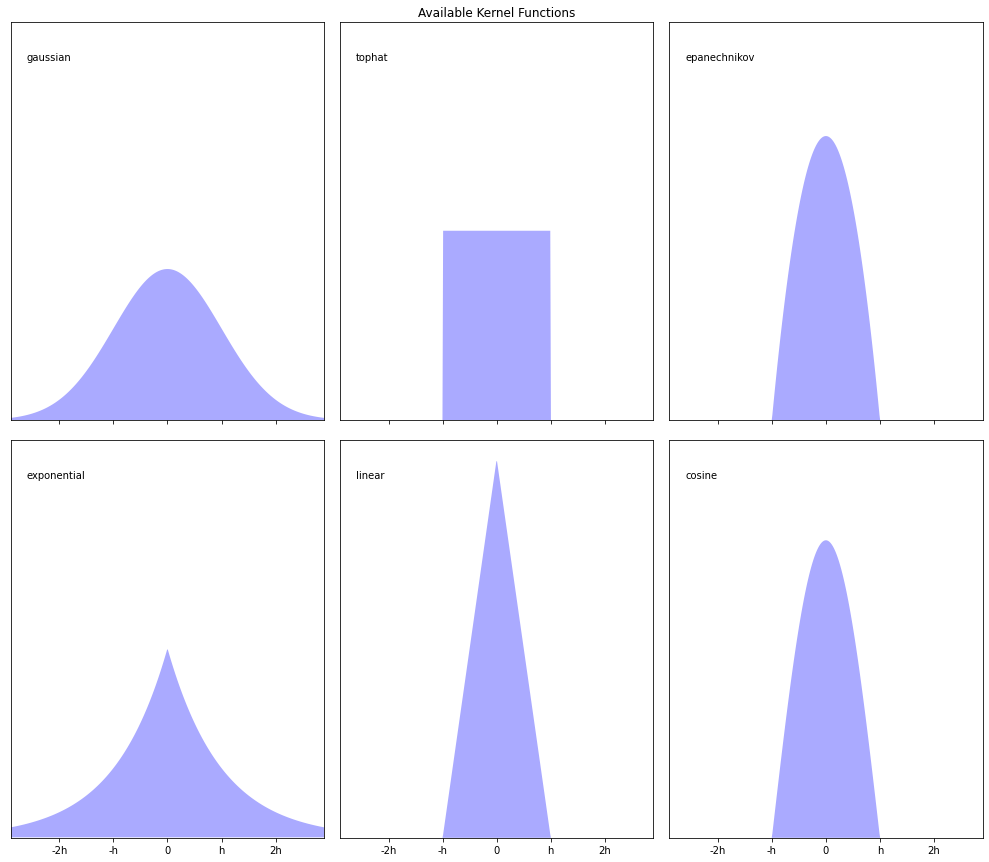

In [6]:
from sklearn.neighbors import KernelDensity
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x

available_kernel_list = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]

for i, kernel in enumerate(available_kernel_list):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernel Functions")


# Kernel Density Estimation

假設 $K(x; h)$ 是 kernel function by the bandwidth parameter $h$，
還有我們收集到的點有 $x_1, x_2, \cdots x_n$。
現在要估計點 $y$ 的機率，

$$
f_K(y) = \sum_{i=1}^n K(y-x_i; h)
$$

則我們就可以把機率密度估計得很連續。

下面是使用範例。


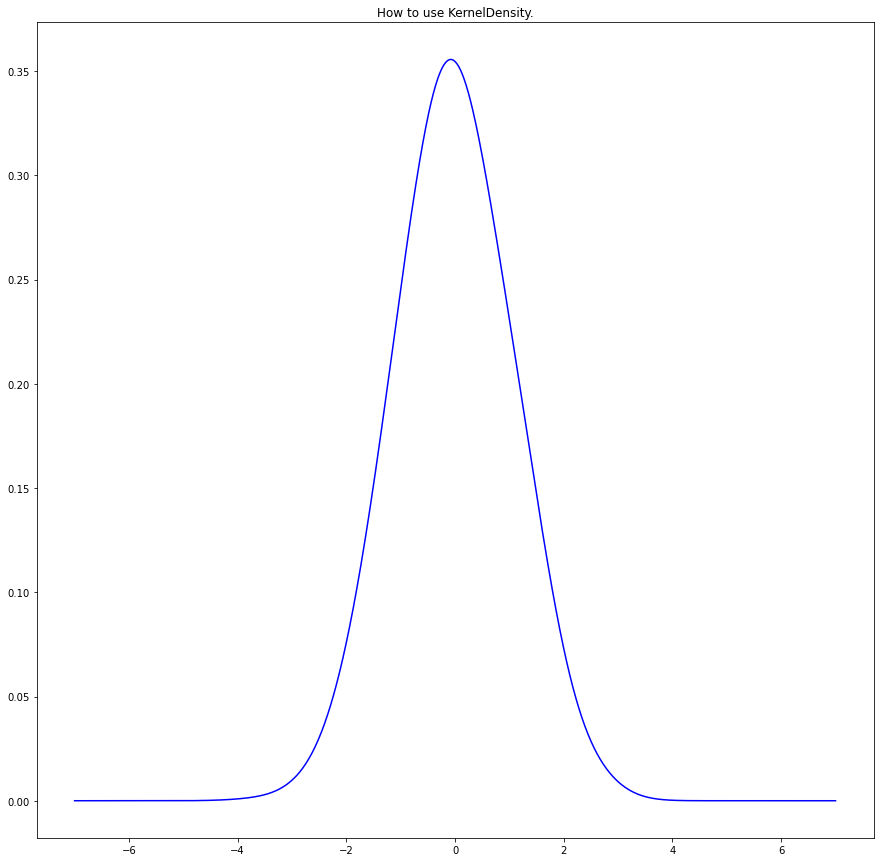

In [7]:
import numpy as np
from sklearn.neighbors import KernelDensity
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]


X_plot = np.linspace(-7, 7, 1000)[:, None]

rand_data = random.randn(1000)[:, None]

log_dens = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(rand_data).score_samples(X_plot)
y = np.exp(log_dens)

plt.plot(X_plot, y, color='blue')
plt.title('How to use KernelDensity.')
plt.show()

